In [14]:
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# lendo arquivo cliente_corr.csv
data_path = os.path.join('..', 'src', 'analytics', 'cliente_corr.csv')
df = pd.read_csv(data_path)
display(df)

,room_type,beds,bed_type,bathrooms,bedrooms,accommodates,review_scores_rating,taxa_de_limpeza,host_is_superhost
0,Entire home/apt,1.0,Real Bed,1.0,1.0,4,95.0,NaN,f
1,Entire home/apt,1.0,Real Bed,1.0,1.0,4,96.0,40.0,t
2,Entire home/apt,7.0,Real Bed,4.5,5.0,11,97.0,300.0,f
3,Entire home/apt,2.0,Real Bed,1.0,0.0,3,NaN,NaN,f
4,Entire home/apt,3.0,Real Bed,2.0,3.0,6,92.0,125.0,f
...,...,...,...,...,...,...,...,...,...
3813,Entire home/apt,3.0,Real Bed,2.0,3.0,6,80.0,230.0,f
3814,Entire home/apt,2.0,Real Bed,1.0,1.0,4,100.0,50.0,f
3815,Entire home/apt,1.0,Real Bed,1.0,1.0,2,NaN,35.0,f
3816,Entire home/apt,1.0,Real Bed,1.0,0.0,2,NaN,45.0,f


In [3]:
# verificaçao de valores nulos 
df.isnull().sum()

room_type                  0
beds                       1
bed_type                   0
bathrooms                 16
bedrooms                   6
accommodates               0
review_scores_rating     647
taxa_de_limpeza         1030
host_is_superhost          2
dtype: int64

In [4]:
df.describe()

,beds,bathrooms,bedrooms,accommodates,review_scores_rating,taxa_de_limpeza
count,3817.000000,3802.000000,3812.000000,3818.000000,3171.000000,2788.000000
mean,1.735394,1.259469,1.307712,3.349398,94.539262,61.710904
std,1.139480,0.590369,0.883395,1.977599,6.606083,48.830341
min,1.000000,0.000000,0.000000,1.000000,20.000000,5.000000
25%,1.000000,1.000000,1.000000,2.000000,93.000000,25.000000
50%,1.000000,1.000000,1.000000,3.000000,96.000000,50.000000
75%,2.000000,1.000000,2.000000,4.000000,99.000000,83.000000
max,15.000000,8.000000,7.000000,16.000000,100.000000,300.000000


In [5]:
# inputando mediana no valor da taxa de limpeza 
df['taxa_de_limpeza'] = df['taxa_de_limpeza'].fillna(df['taxa_de_limpeza'].median())

In [6]:
df.describe()

,beds,bathrooms,bedrooms,accommodates,review_scores_rating,taxa_de_limpeza
count,3817.000000,3802.000000,3812.000000,3818.000000,3171.000000,3818.000000
mean,1.735394,1.259469,1.307712,3.349398,94.539262,58.551598
std,1.139480,0.590369,0.883395,1.977599,6.606083,42.047668
min,1.000000,0.000000,0.000000,1.000000,20.000000,5.000000
25%,1.000000,1.000000,1.000000,2.000000,93.000000,35.000000
50%,1.000000,1.000000,1.000000,3.000000,96.000000,50.000000
75%,2.000000,1.000000,2.000000,4.000000,99.000000,65.000000
max,15.000000,8.000000,7.000000,16.000000,100.000000,300.000000


In [7]:
df = df.dropna(axis=0) # dropando as demais linhas de valores nulos

In [9]:
display(df)

,room_type,beds,bed_type,bathrooms,bedrooms,accommodates,review_scores_rating,taxa_de_limpeza,host_is_superhost
0,Entire home/apt,1.0,Real Bed,1.0,1.0,4,95.0,50.0,f
1,Entire home/apt,1.0,Real Bed,1.0,1.0,4,96.0,40.0,t
2,Entire home/apt,7.0,Real Bed,4.5,5.0,11,97.0,300.0,f
4,Entire home/apt,3.0,Real Bed,2.0,3.0,6,92.0,125.0,f
5,Private room,1.0,Real Bed,1.0,1.0,2,95.0,40.0,f
...,...,...,...,...,...,...,...,...,...
3810,Entire home/apt,3.0,Real Bed,1.0,2.0,5,92.0,85.0,f
3811,Entire home/apt,1.0,Real Bed,1.0,1.0,3,100.0,20.0,f
3812,Entire home/apt,2.0,Real Bed,1.0,1.0,4,96.0,50.0,t
3813,Entire home/apt,3.0,Real Bed,2.0,3.0,6,80.0,230.0,f


In [11]:
# separaçao de valores numericos e object
num_col = df.select_dtypes(exclude='object')
cat_col = df.select_dtypes(exclude='number').columns

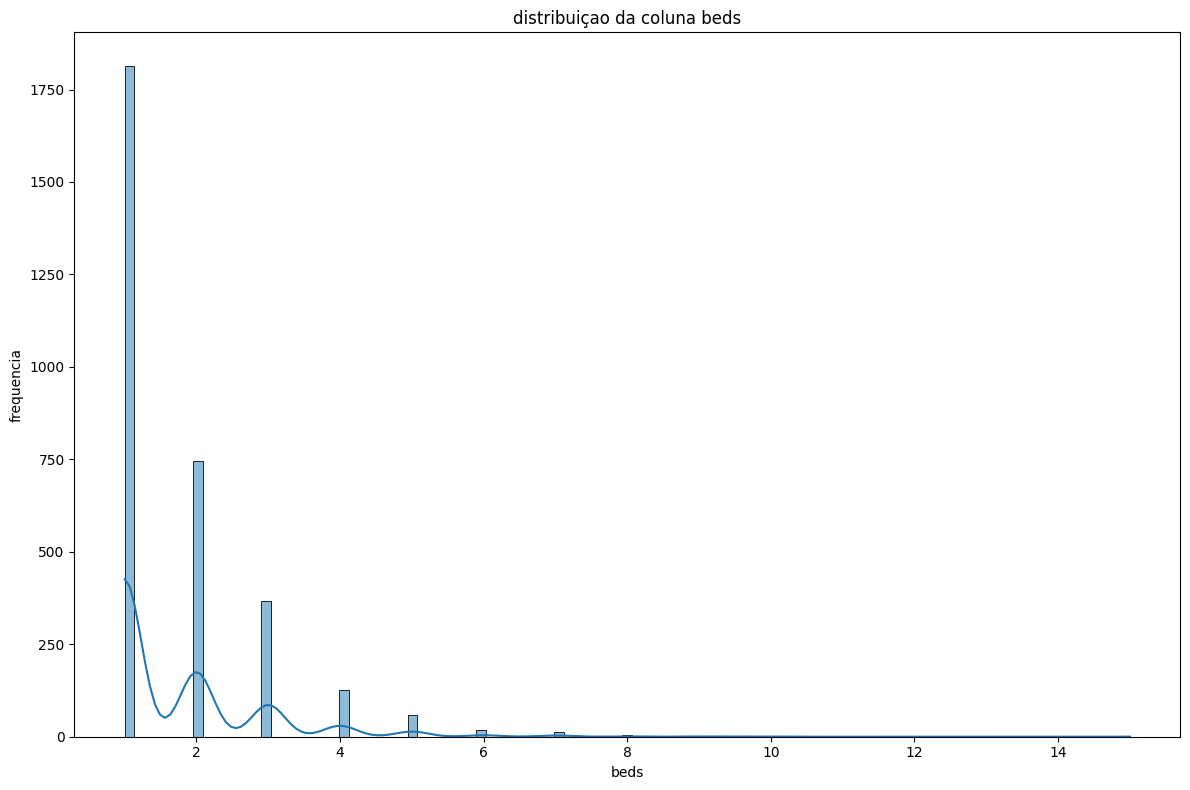

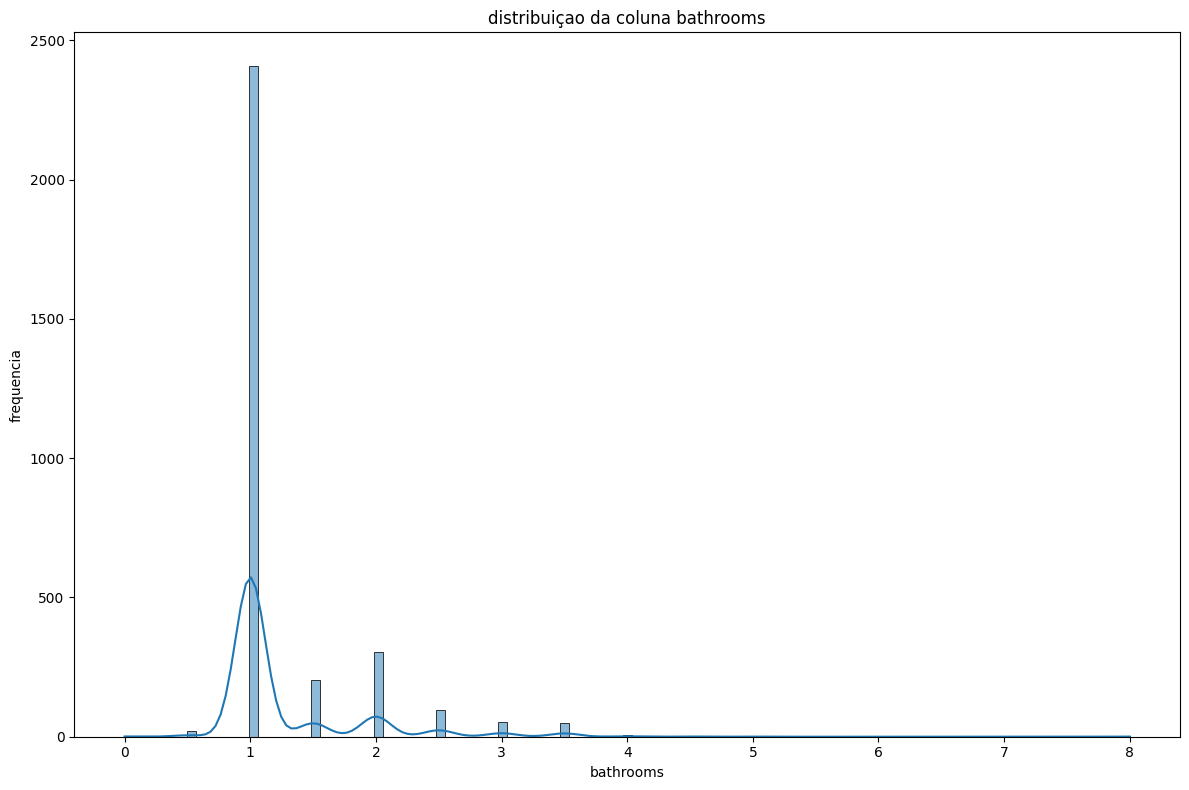

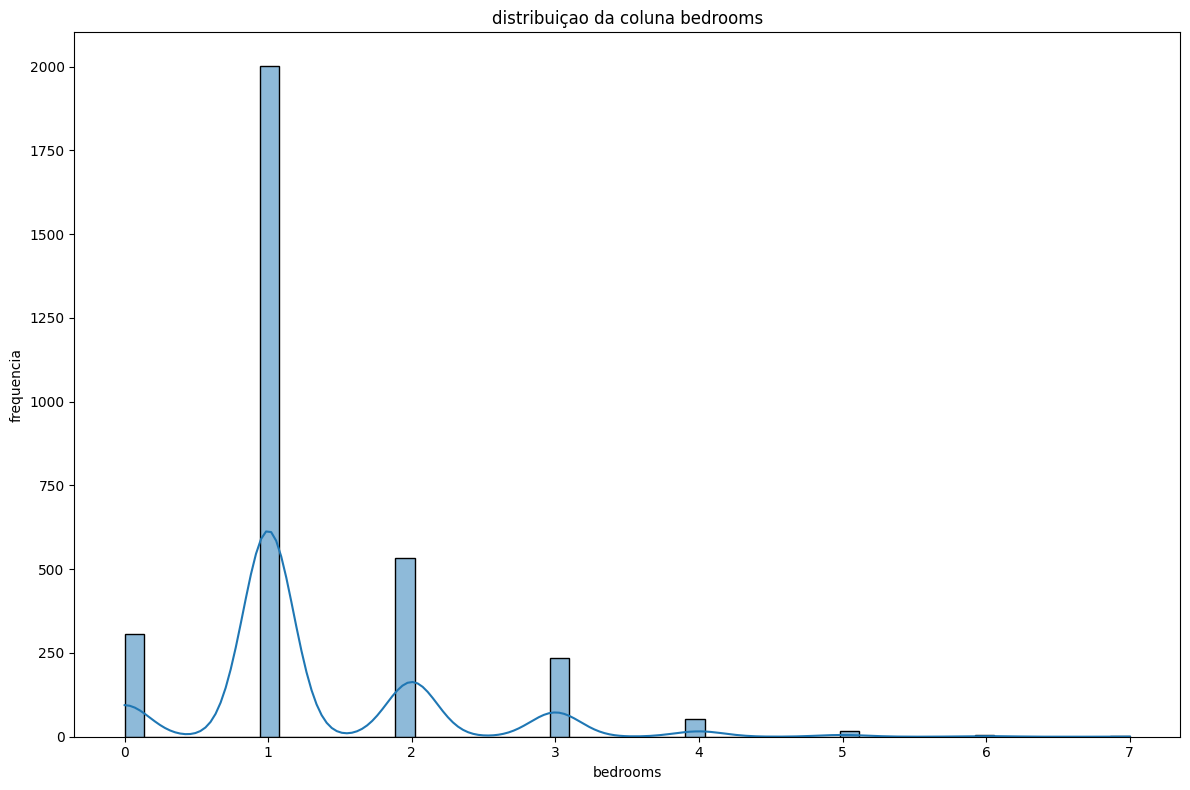

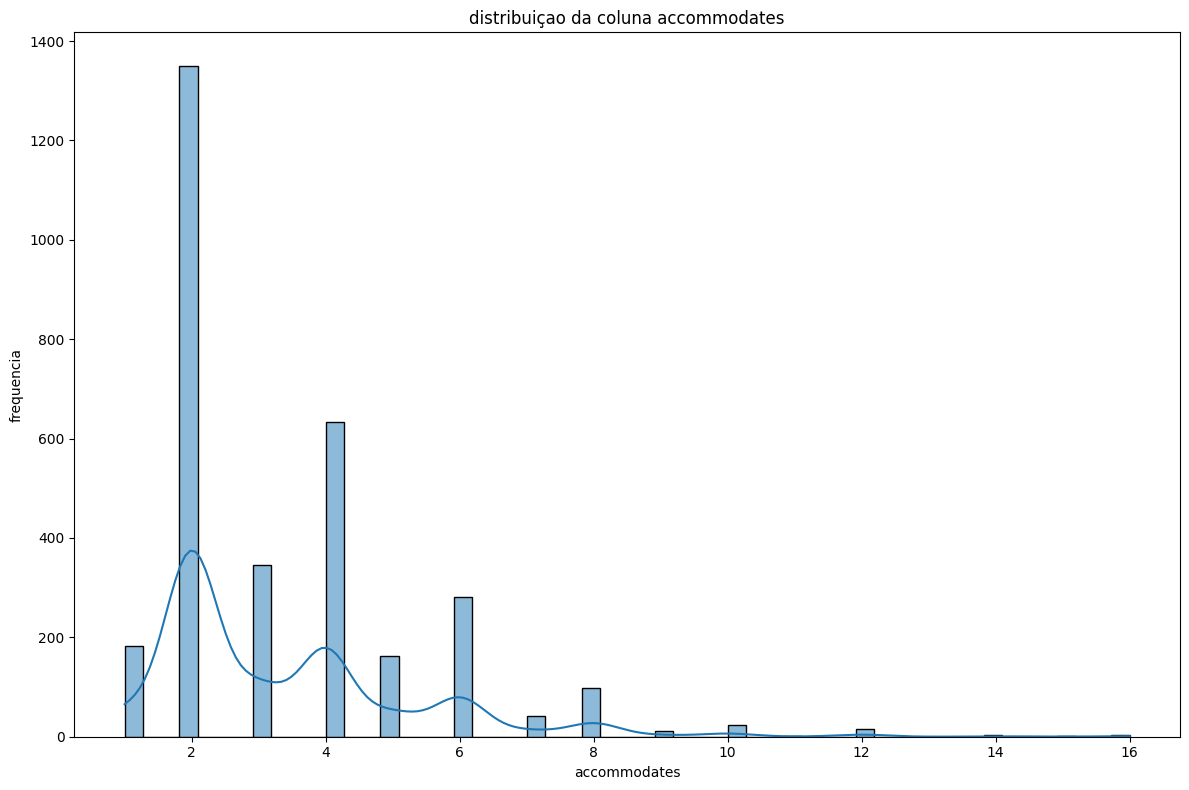

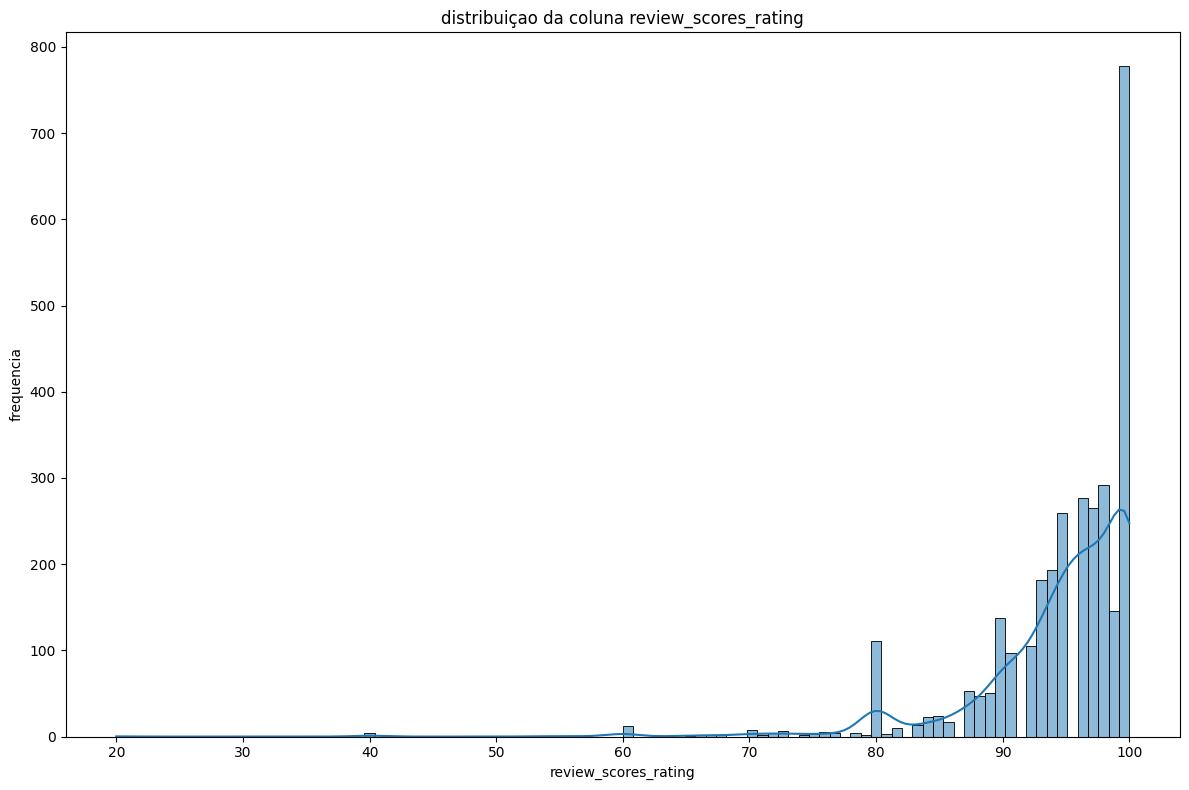

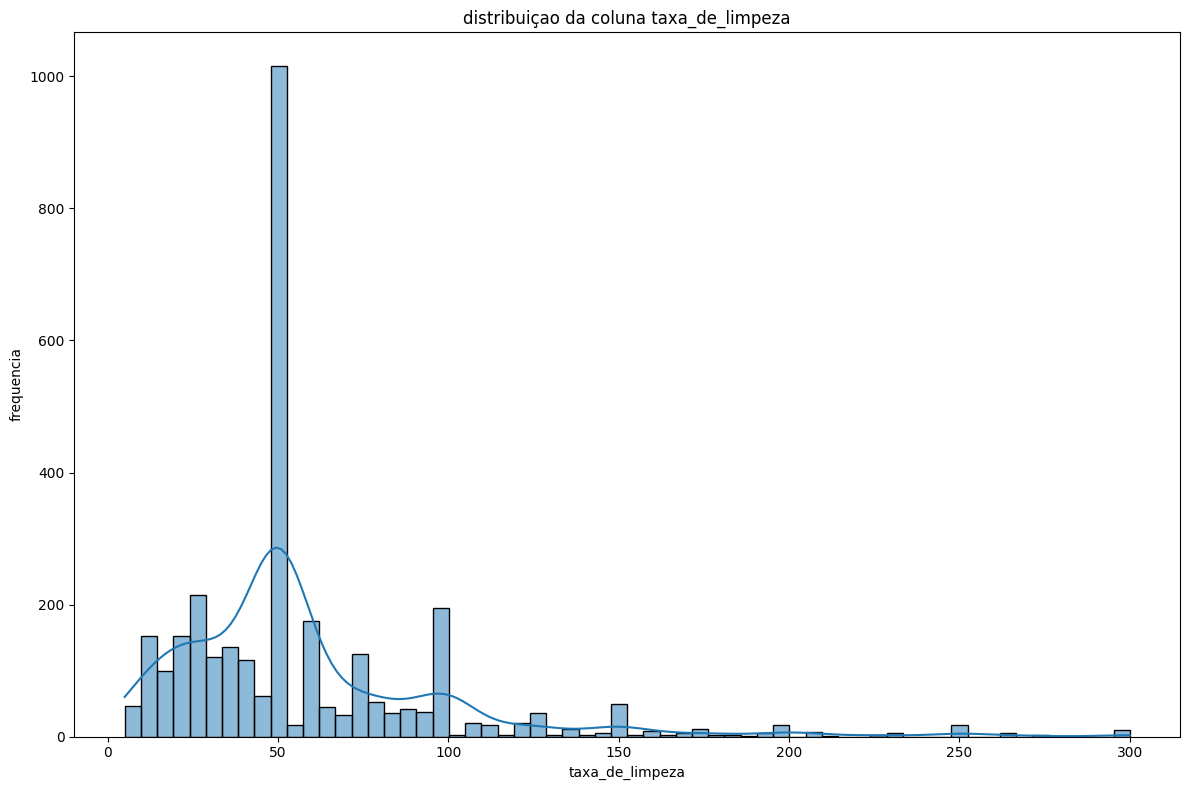

In [21]:
# verificando distribuiçoes 
for num in num_col:
    plt.figure(figsize=(12,8))
    plt.title(f'distribuiçao da coluna {num}')
    sns.histplot(data=df, x=num, kde=True)
    plt.xlabel(f'{num}')
    plt.ylabel('frequencia')
    plt.tight_layout()
    plt.show()

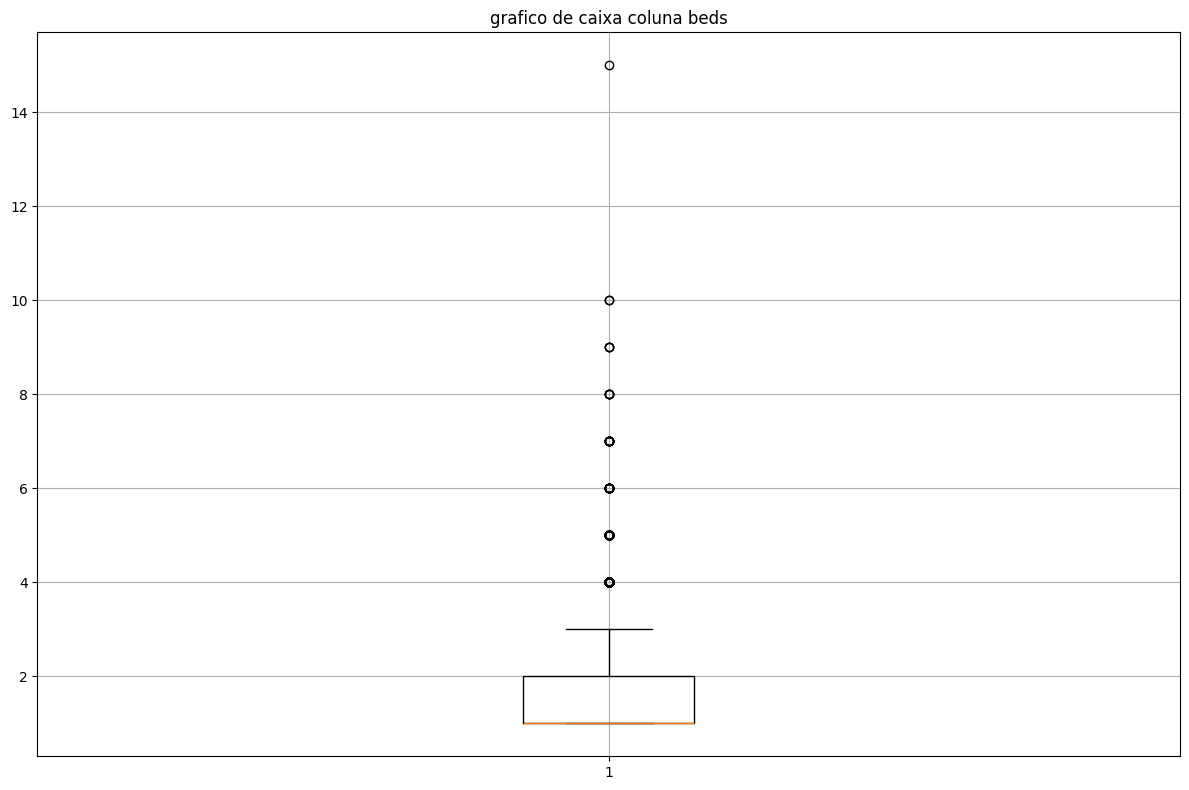

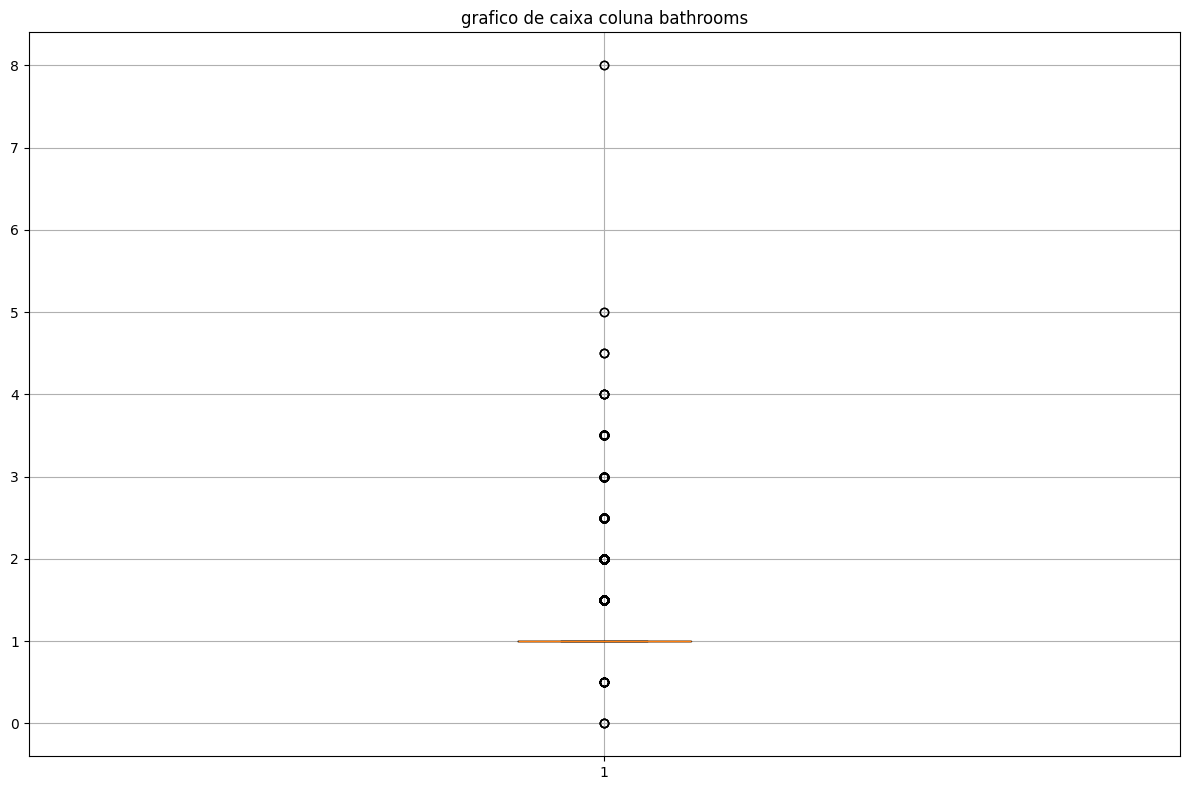

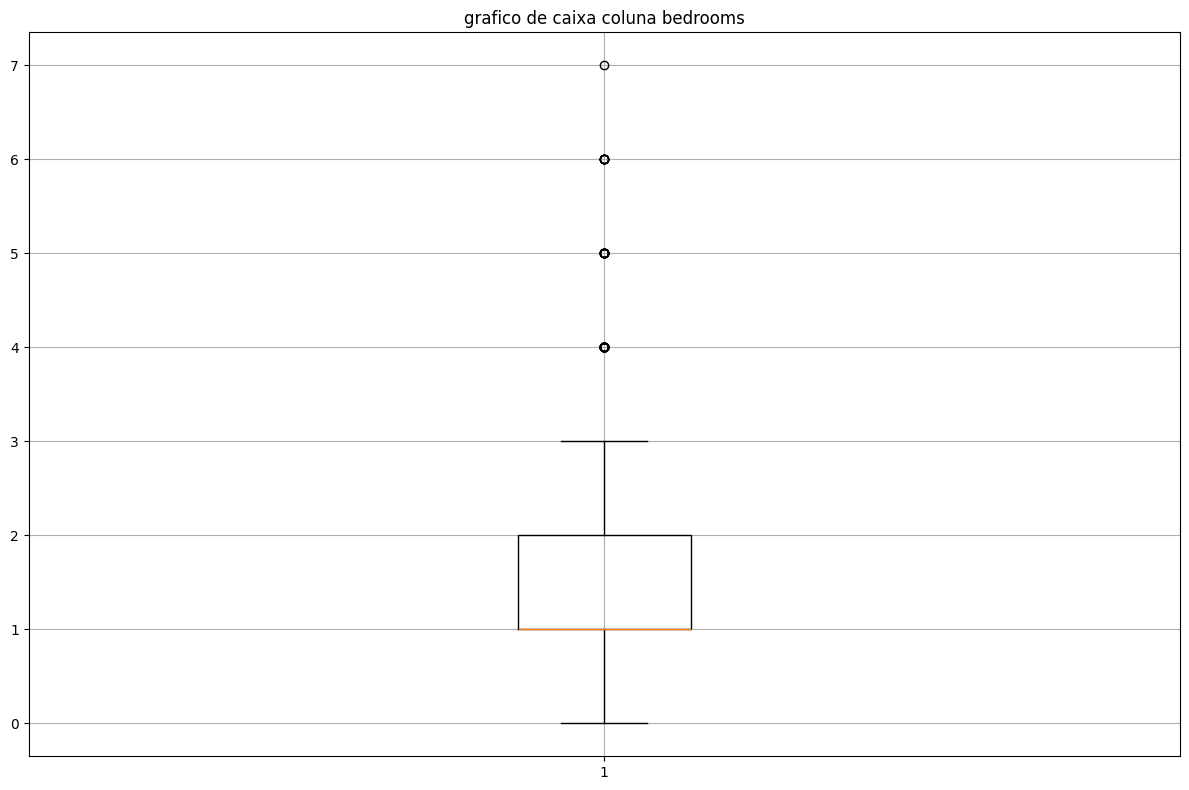

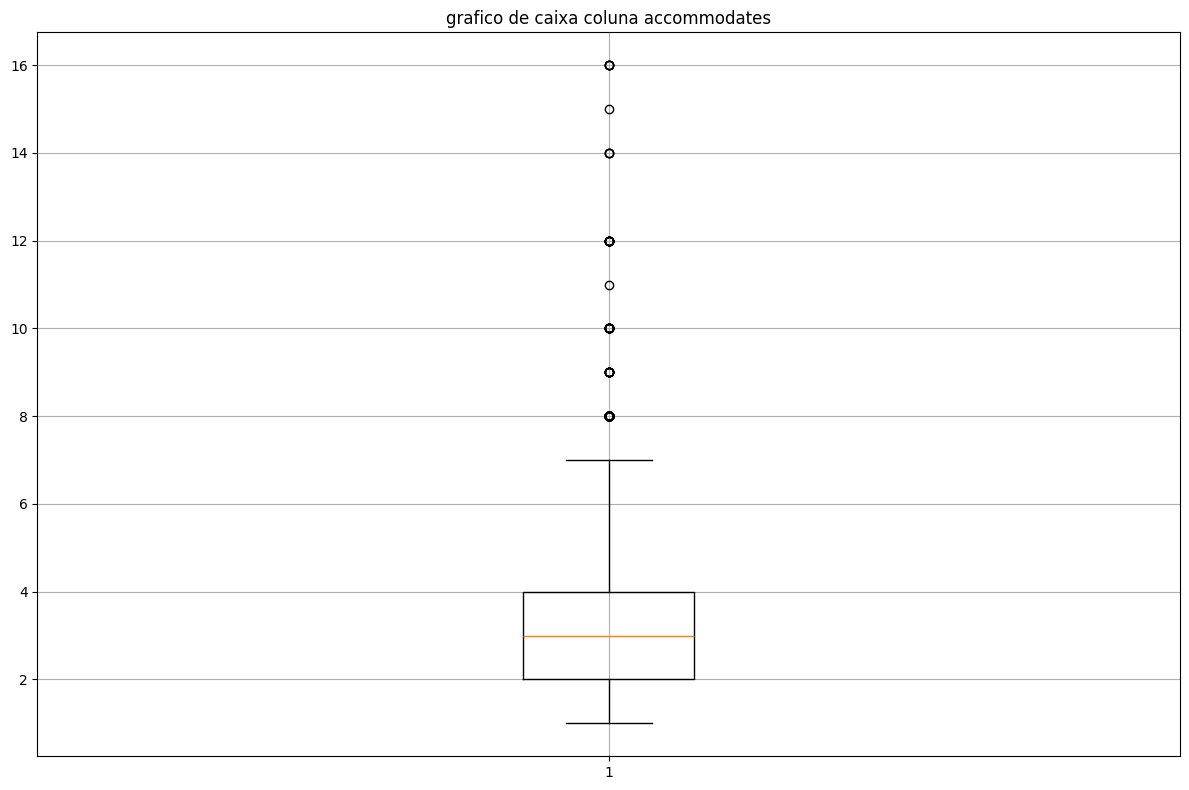

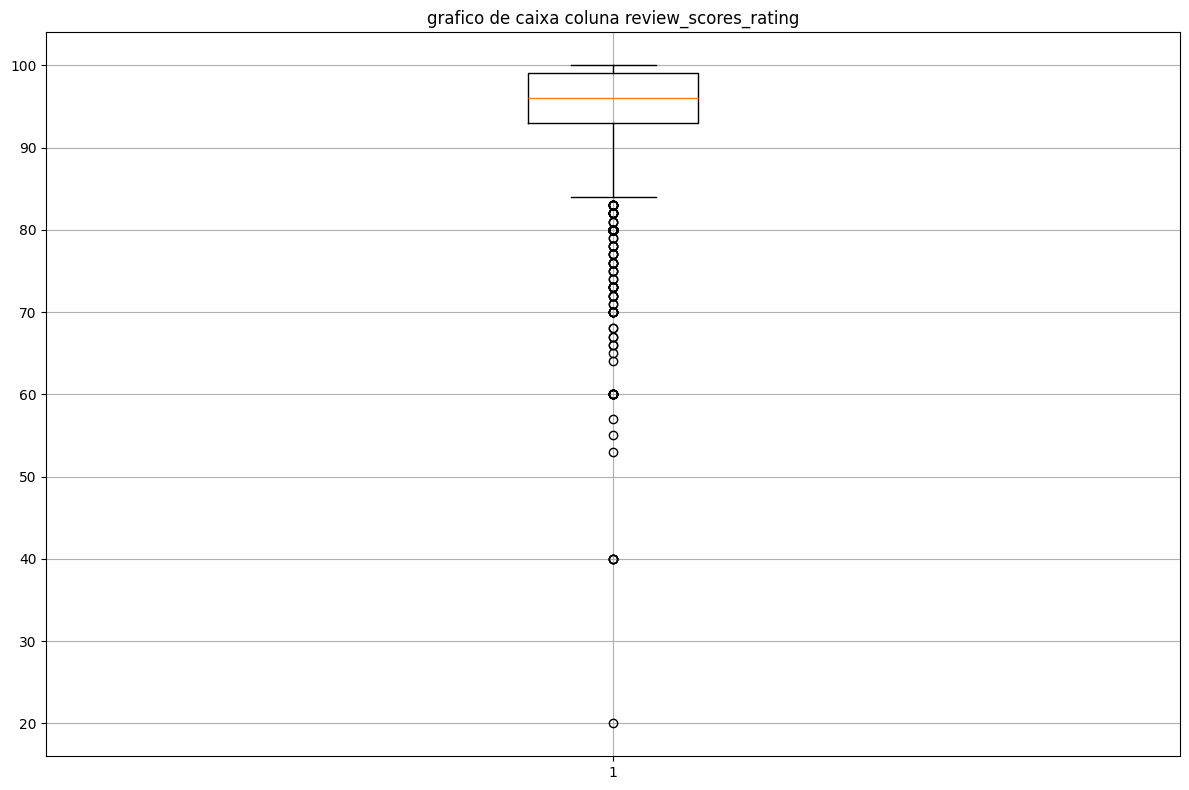

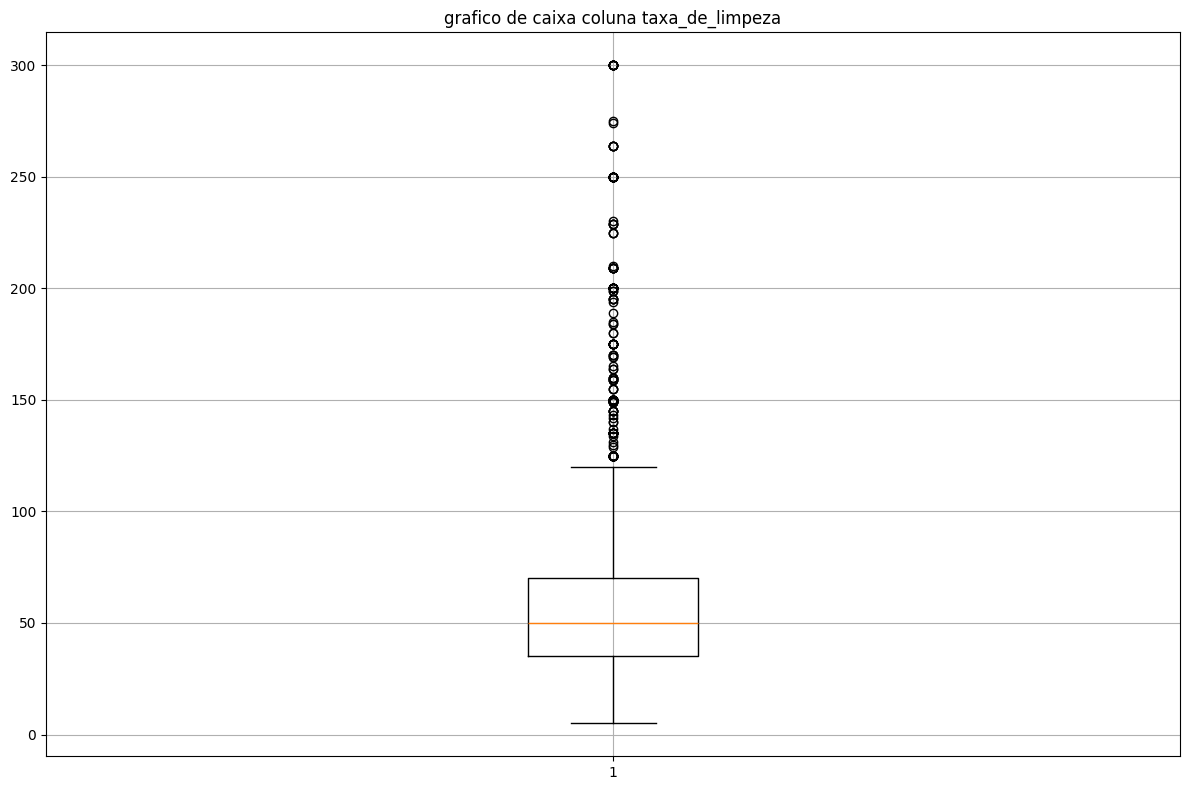

In [25]:
# graficos de caixa 
for box in num_col: 
    plt.figure(figsize=(12,8))
    plt.title(f'grafico de caixa coluna {box}')
    #sns.violinplot(data=df, y=box)
    plt.boxplot(data=df, x=box)
    plt.tight_layout()
    plt.grid()
    plt.show()

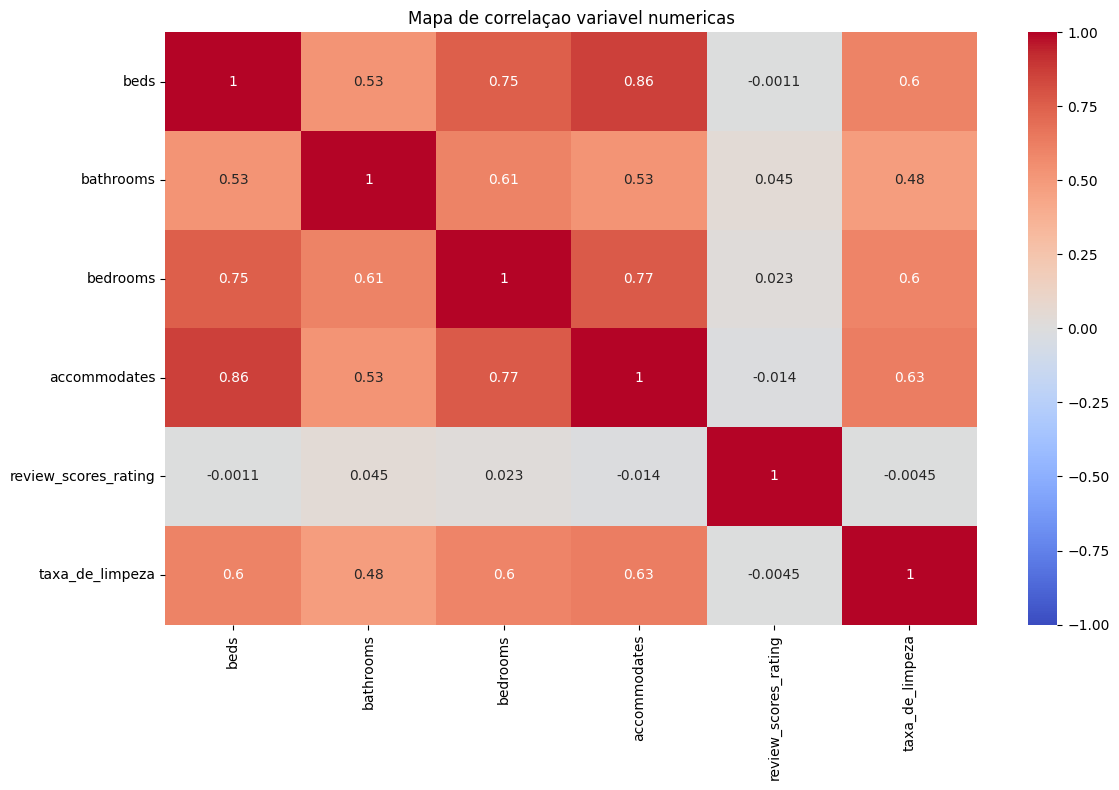

In [ ]:
# mapa de correlaçao 
plt.figure(figsize=(12,8))
plt.title('Mapa de correlaçao variavel numericas')
sns.heatmap(num_col.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, 
            cbar=True)
plt.tight_layout()
plt.show()

In [34]:
df.columns

Index(['room_type', 'beds', 'bed_type', 'bathrooms', 'bedrooms',
       'accommodates', 'review_scores_rating', 'taxa_de_limpeza',
       'host_is_superhost'],
      dtype='object')

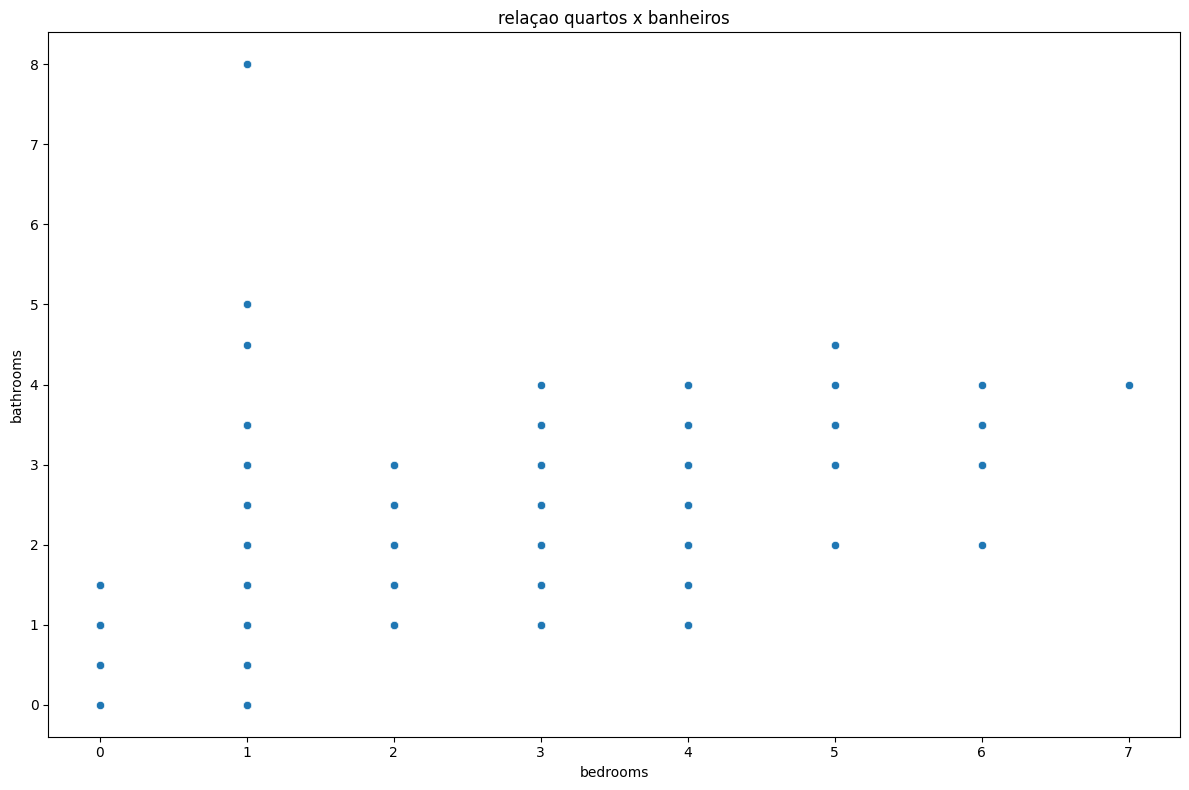

In [59]:
# vizualizando relaçao quartos x banheiros
plt.figure(figsize=(12,8))
plt.title('relaçao quartos x banheiros')
sns.scatterplot(data=df, x='bedrooms', y='bathrooms')
plt.tight_layout()
plt.show()

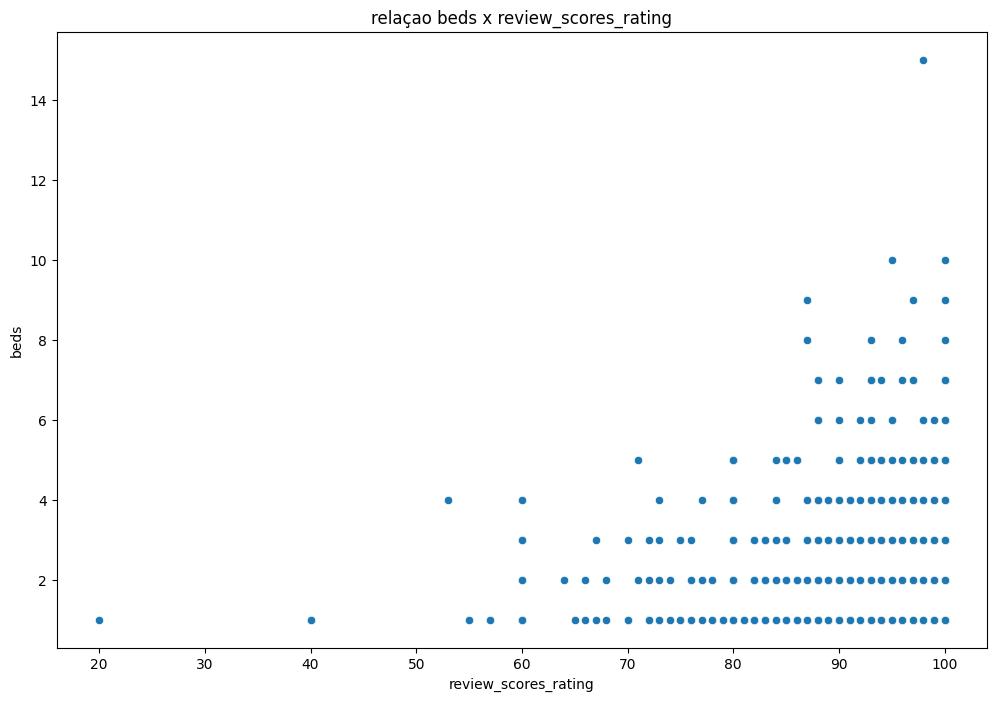

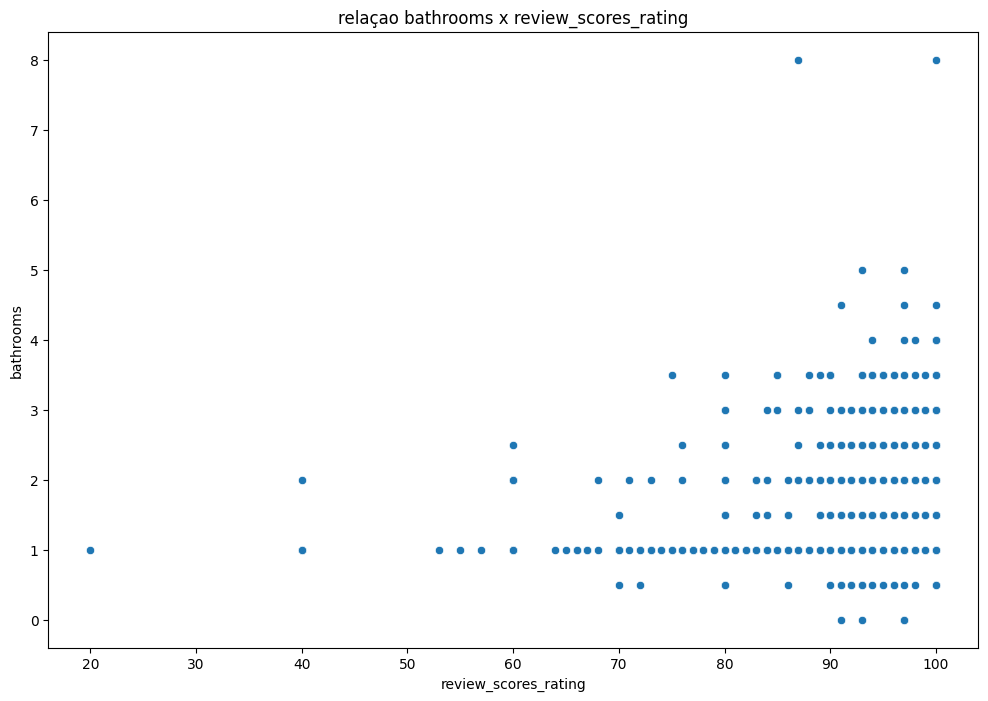

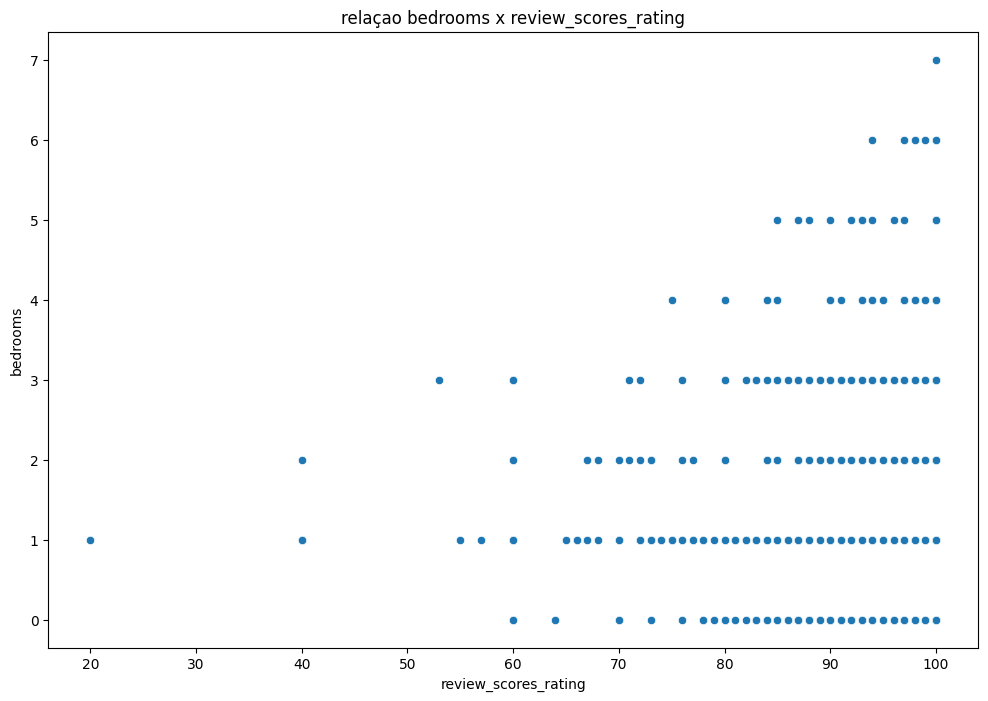

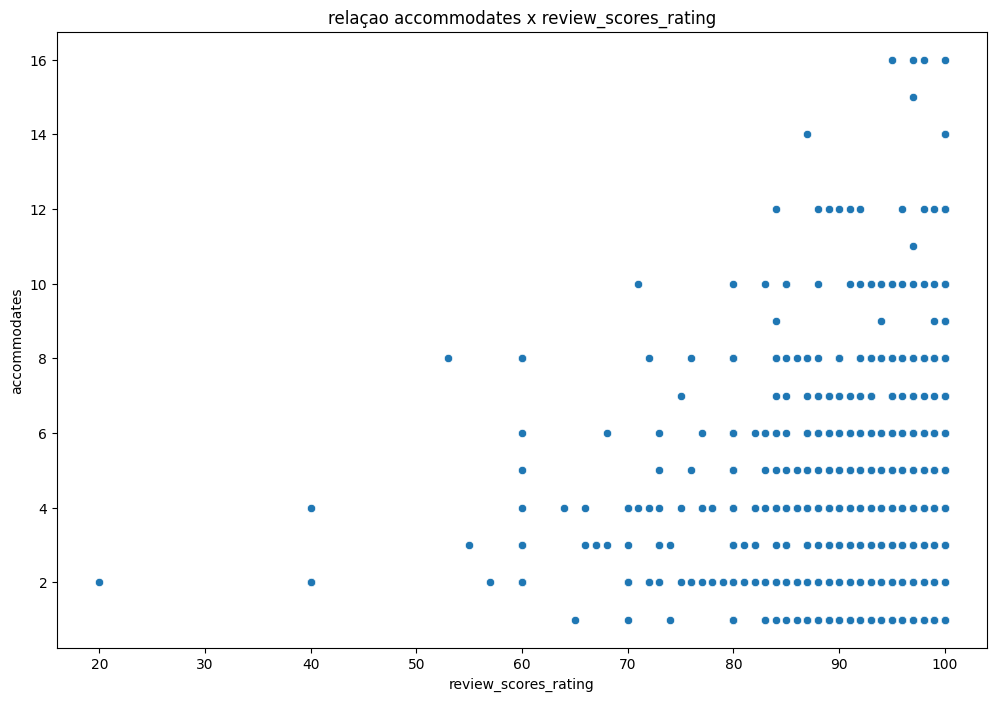

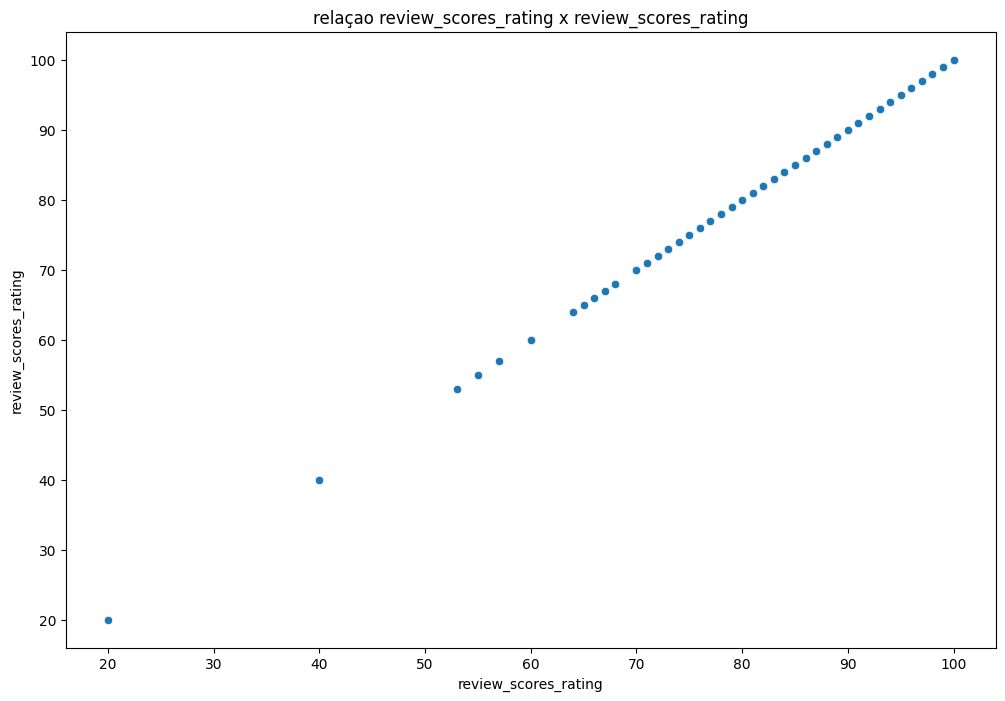

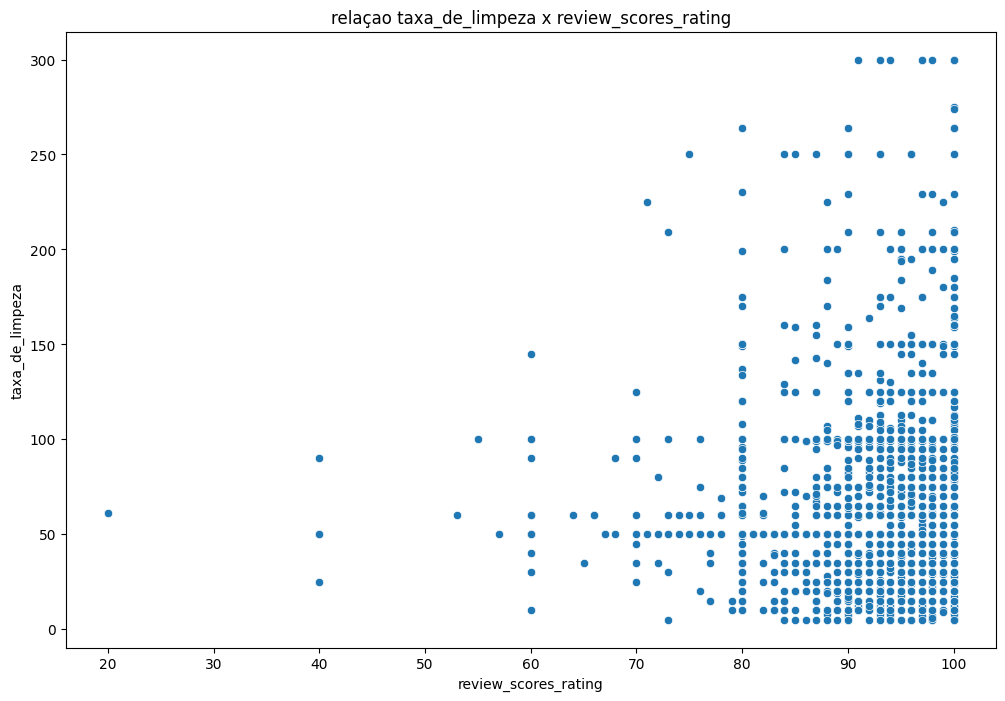

In [62]:
for corr in num_col:
    plt.figure(figsize=(12,8))
    plt.title(f'relaçao {corr} x review_scores_rating')
    sns.scatterplot(data=df, y=corr, x='review_scores_rating')

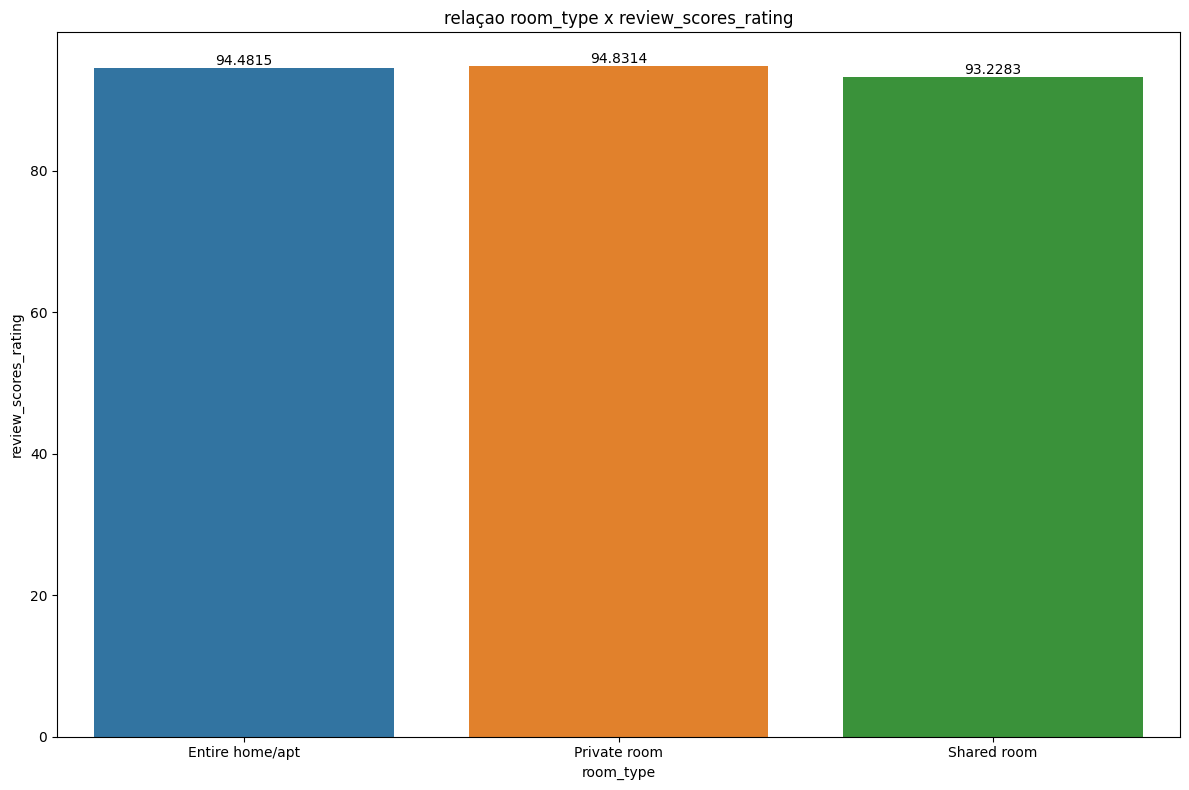

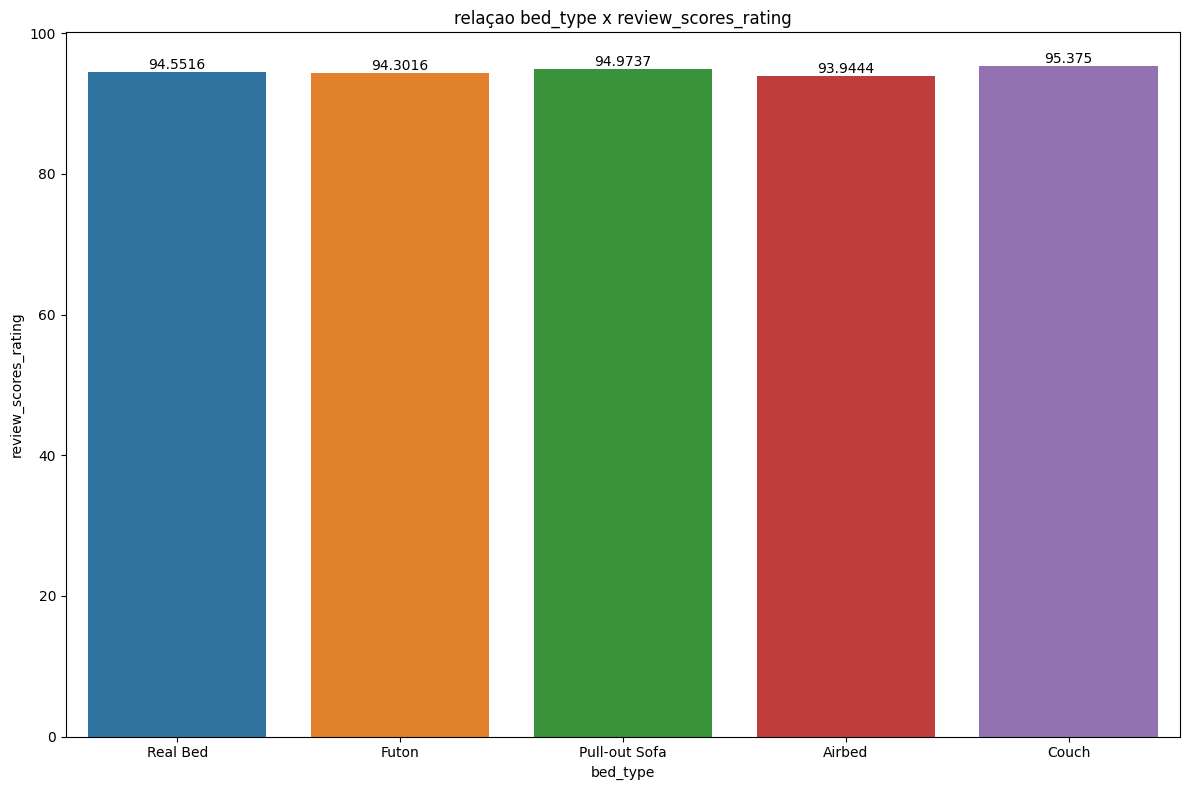

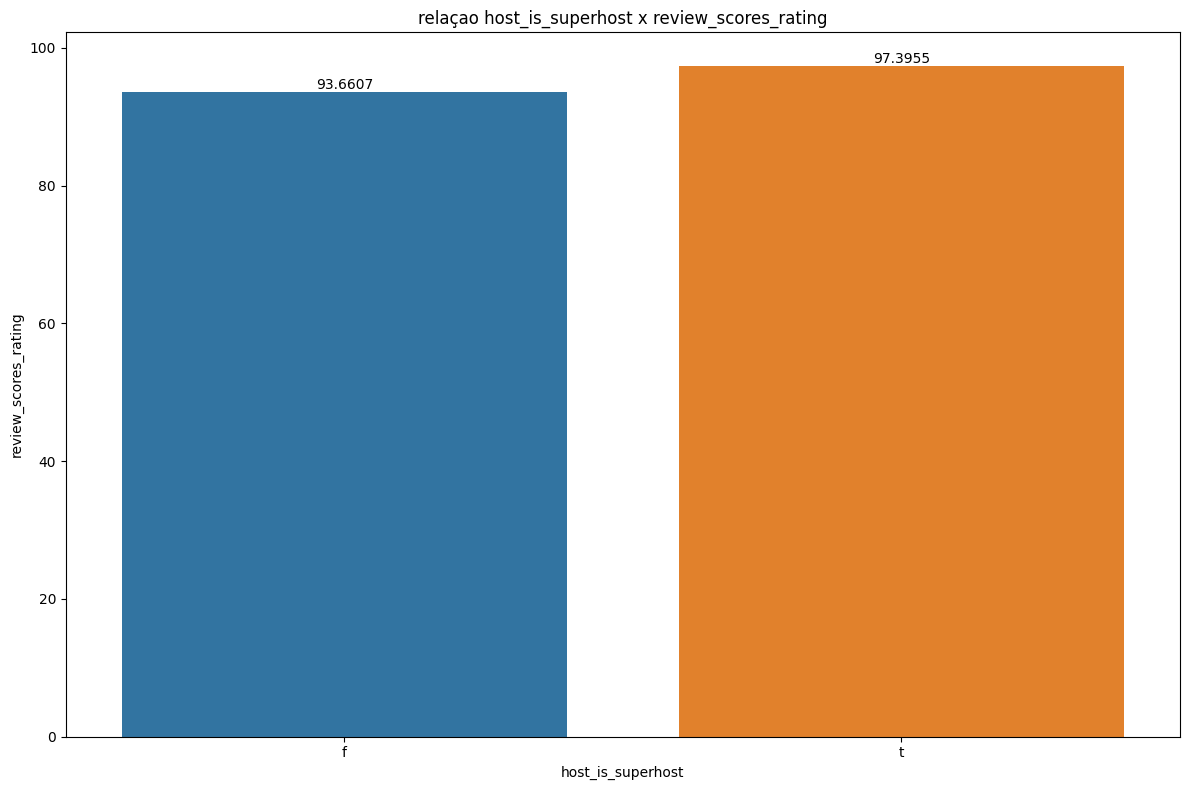

In [89]:
for cat in cat_col:
    plt.figure(figsize=(12,8))
    plt.title(f'relaçao {cat} x review_scores_rating')
    ax = sns.barplot(data=df, x=cat, y='review_scores_rating', hue=cat, errorbar=None)
    for container in ax.containers:
        ax.bar_label(container, fontsize=10)
    plt.tight_layout()
    plt.show()

In [90]:
df.columns

Index(['room_type', 'beds', 'bed_type', 'bathrooms', 'bedrooms',
       'accommodates', 'review_scores_rating', 'taxa_de_limpeza',
       'host_is_superhost'],
      dtype='object')

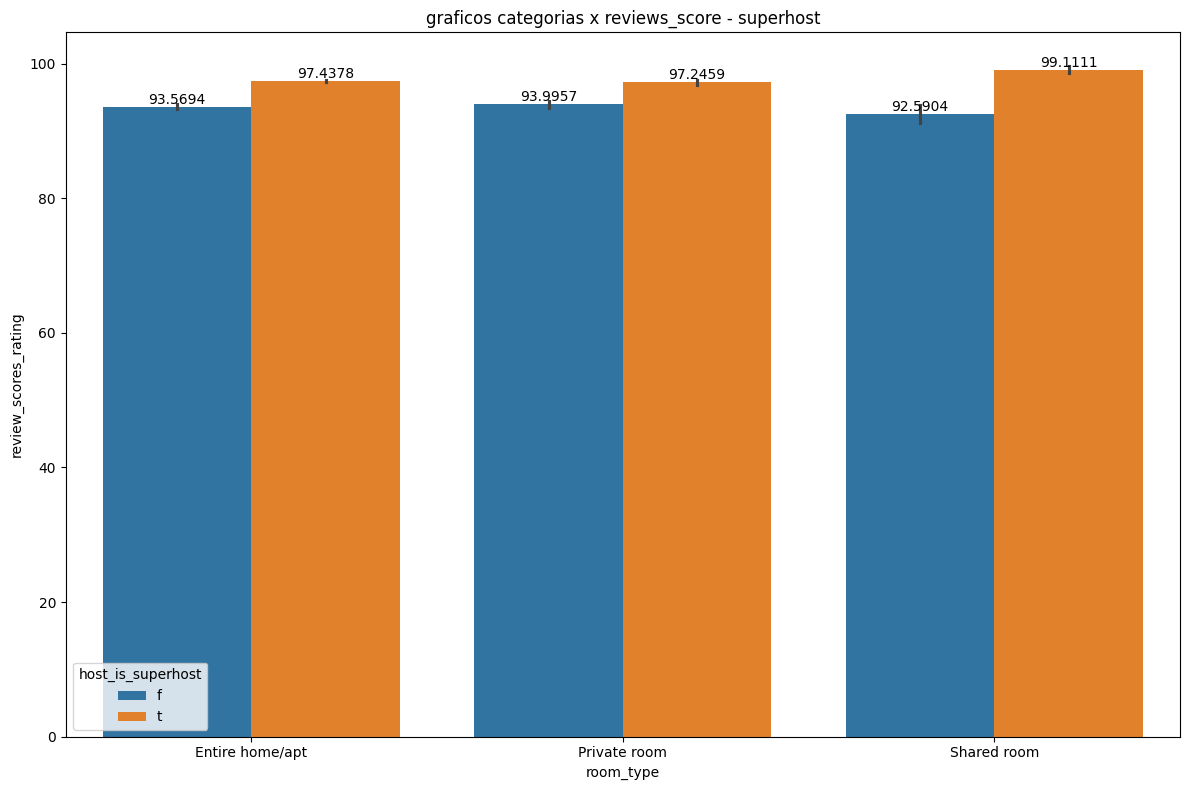

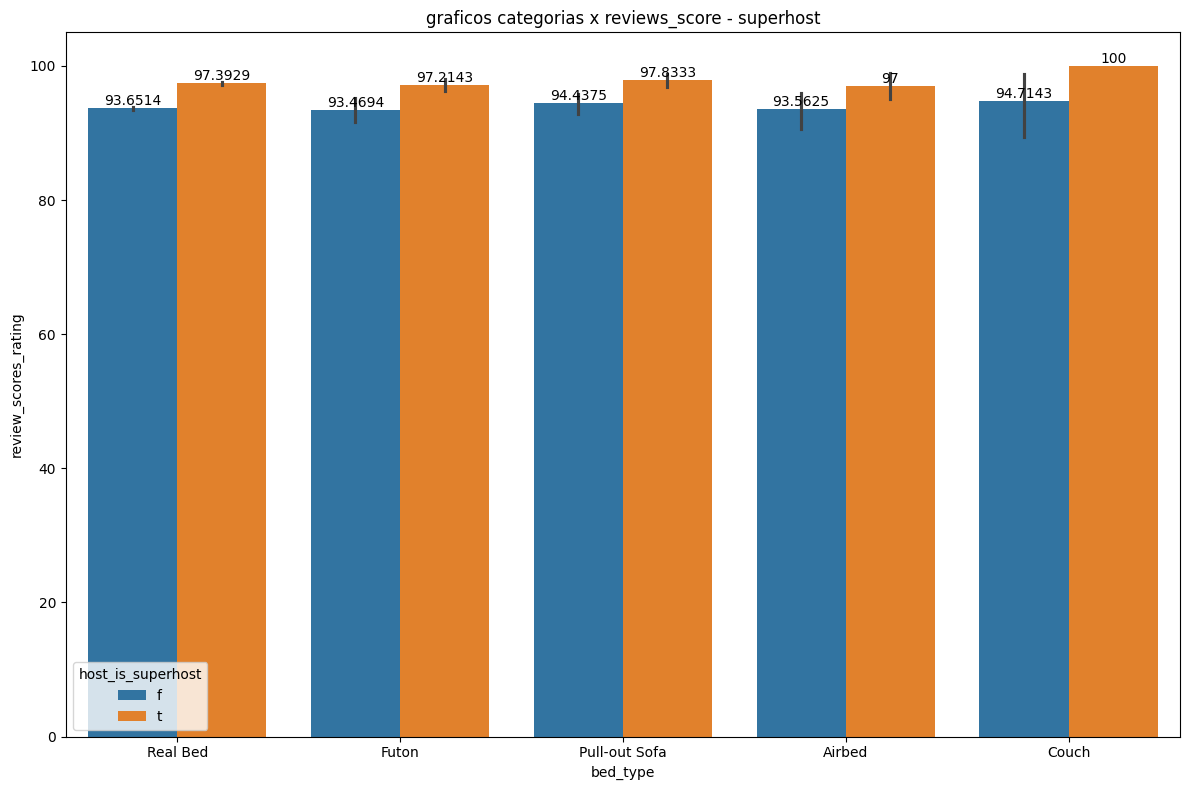

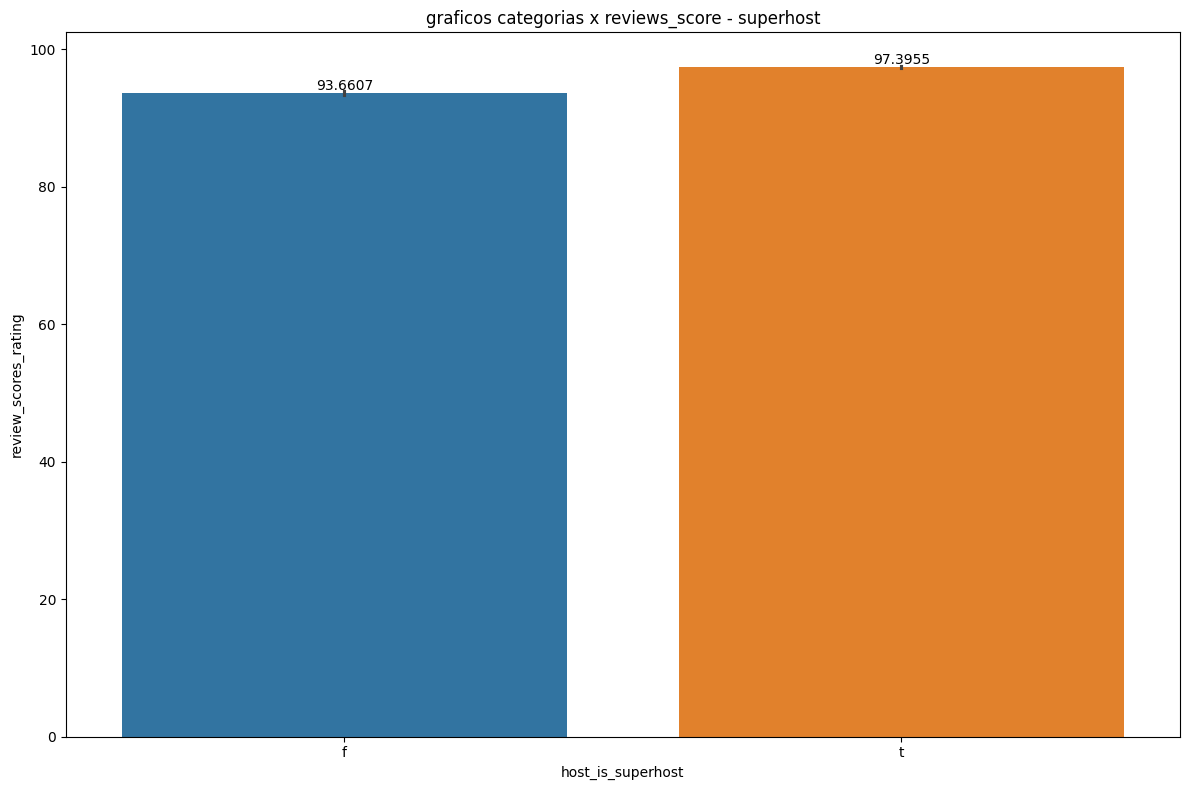

In [98]:
for superhost in cat_col:
    plt.figure(figsize=(12,8))
    plt.title(f'graficos categorias x reviews_score - superhost')
    ax = sns.barplot(data=df, x=superhost, y='review_scores_rating', hue='host_is_superhost')
    for container in ax.containers:
        ax.bar_label(container, fontsize=10)
    plt.tight_layout()
    plt.show()

In [99]:
df

,room_type,beds,bed_type,bathrooms,bedrooms,accommodates,review_scores_rating,taxa_de_limpeza,host_is_superhost
0,Entire home/apt,1.0,Real Bed,1.0,1.0,4,95.0,50.0,f
1,Entire home/apt,1.0,Real Bed,1.0,1.0,4,96.0,40.0,t
2,Entire home/apt,7.0,Real Bed,4.5,5.0,11,97.0,300.0,f
4,Entire home/apt,3.0,Real Bed,2.0,3.0,6,92.0,125.0,f
5,Private room,1.0,Real Bed,1.0,1.0,2,95.0,40.0,f
...,...,...,...,...,...,...,...,...,...
3810,Entire home/apt,3.0,Real Bed,1.0,2.0,5,92.0,85.0,f
3811,Entire home/apt,1.0,Real Bed,1.0,1.0,3,100.0,20.0,f
3812,Entire home/apt,2.0,Real Bed,1.0,1.0,4,96.0,50.0,t
3813,Entire home/apt,3.0,Real Bed,2.0,3.0,6,80.0,230.0,f


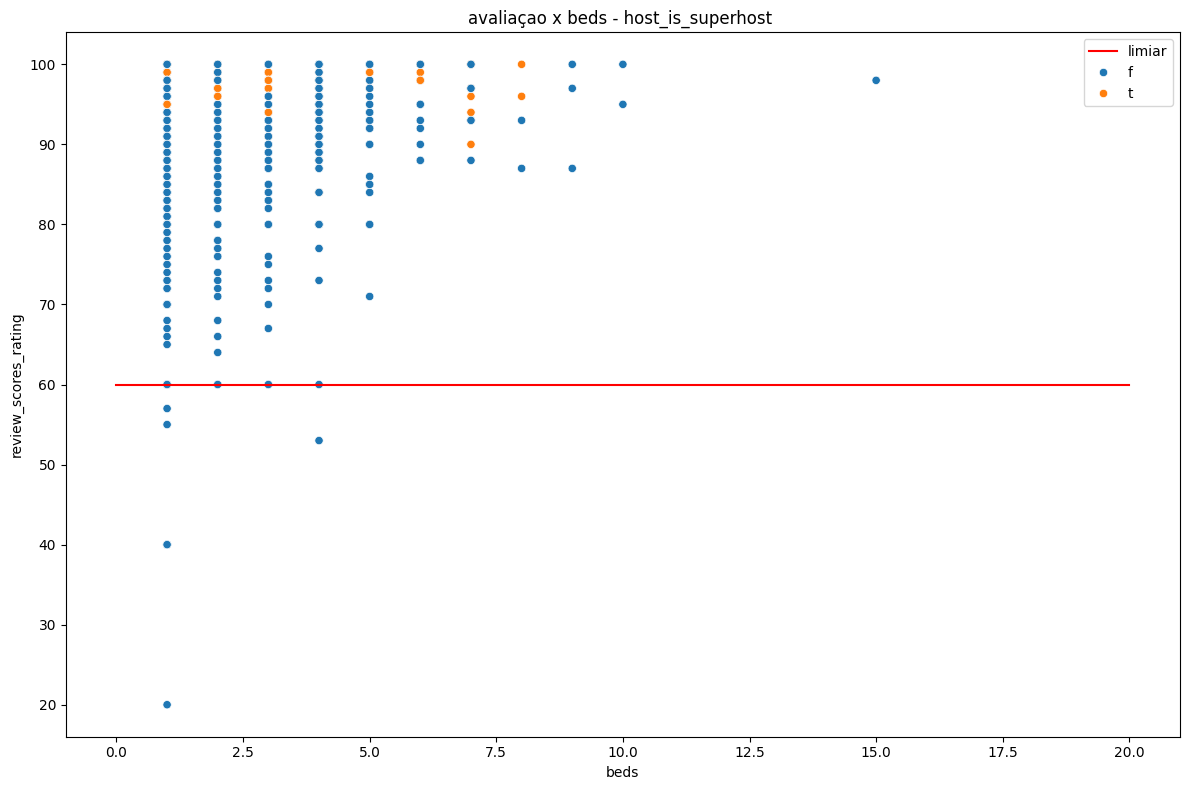

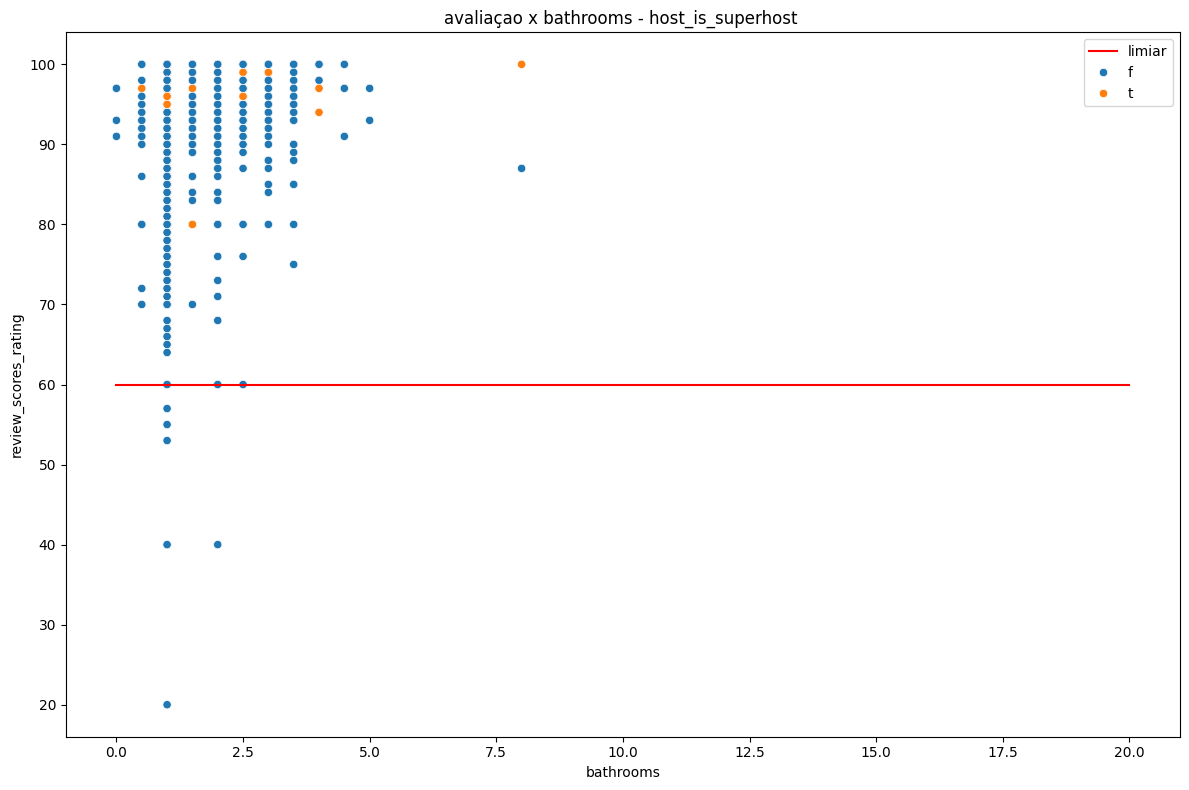

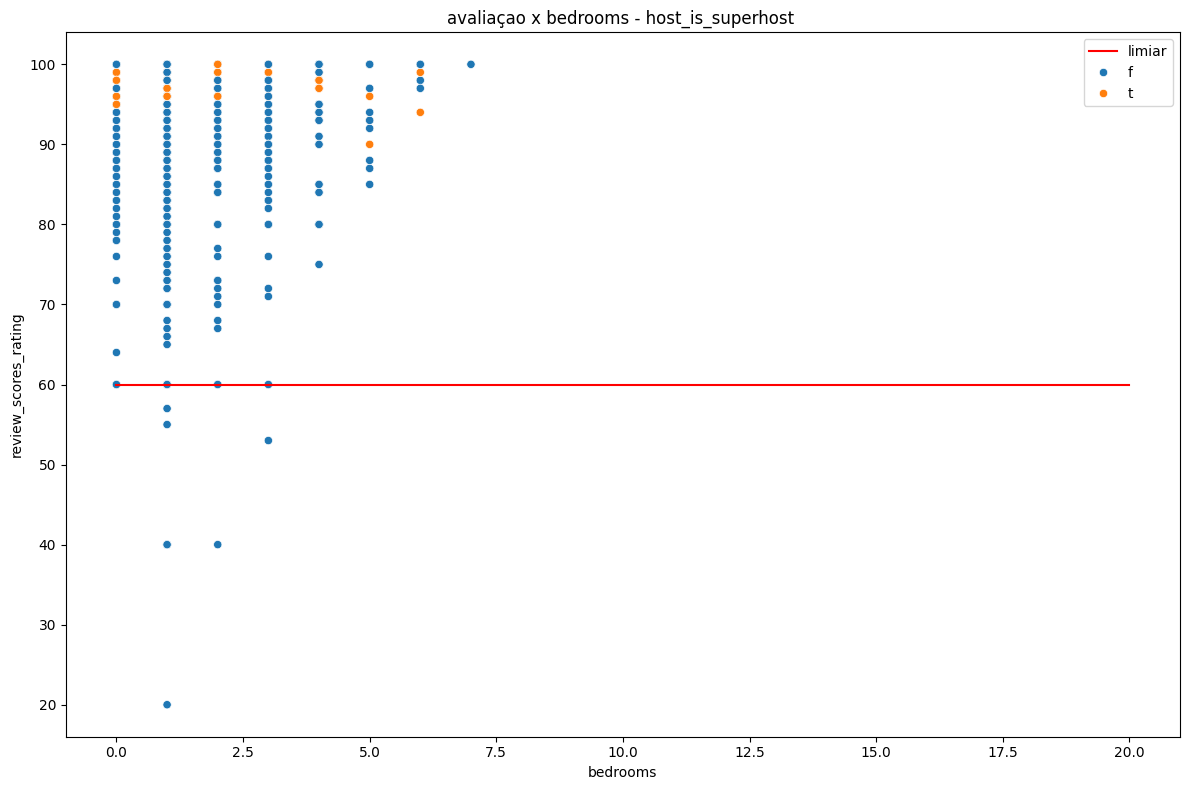

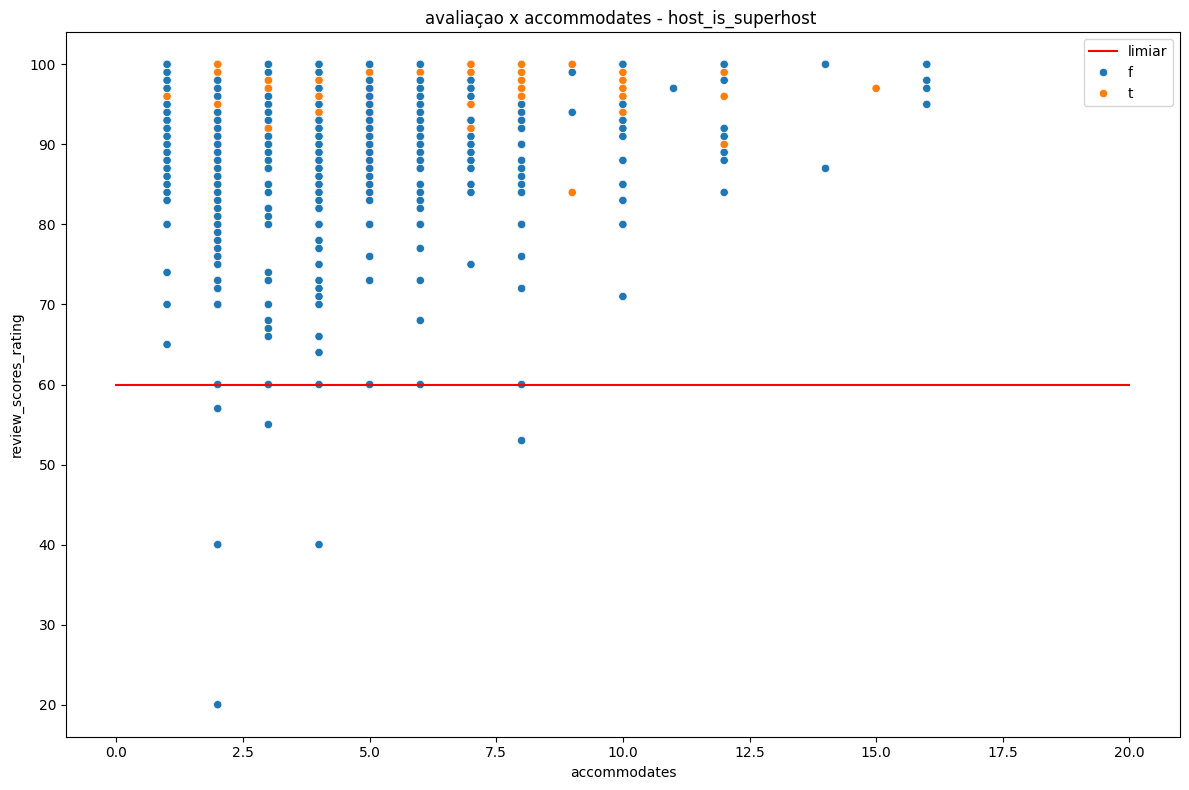

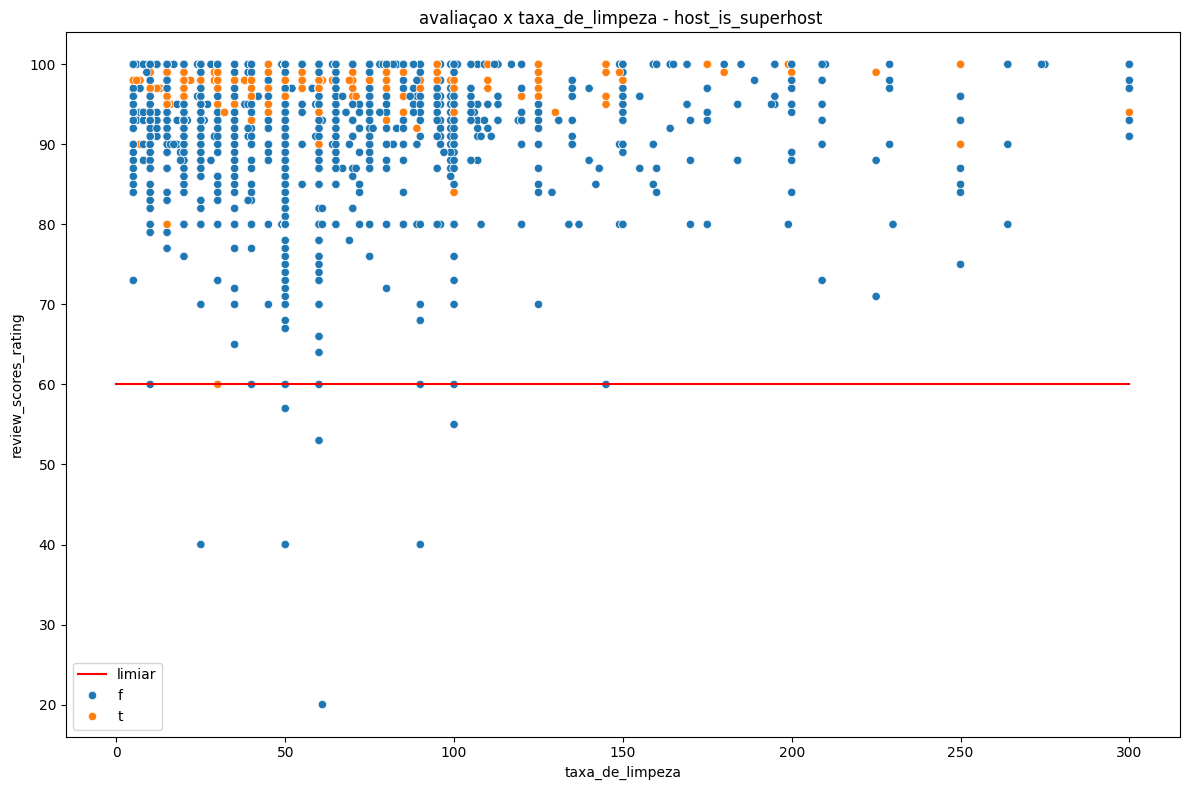

In [126]:
# vizualizando superhosts x avaliaçao e colunas numericas 
for num_superhosts in num_col: 
    if num_superhosts != 'review_scores_rating':
        plt.figure(figsize=(12,8))
        plt.title(f'avaliaçao x {num_superhosts} - host_is_superhost ')
        if num_superhosts != 'taxa_de_limpeza':
            sns.lineplot(x=[0,20], y=[60,60], label='limiar', color='red')
        if num_superhosts == 'taxa_de_limpeza':
            sns.lineplot(x=[0,300], y=[60,60], label='limiar', color='red')
        sns.scatterplot(data=df, x=num_superhosts, y='review_scores_rating', hue='host_is_superhost')
        
        plt.tight_layout()
        plt.legend()
        plt.show()

## Resumo:


De modo geral, os locatários não apresentam grandes diferenças em relação ao número de acomodações, banheiros ou outros fatores estruturais que possam impactar de forma significativa a avaliação do imóvel.

Aspectos como localização, especialmente a proximidade de grandes centros, pontos turísticos e áreas seguras, parecem exercer uma influência maior na percepção dos hóspedes.

Embora variáveis como número de cômodos ou taxa de serviço não afetem tanto a nota final, observamos que os superhosts têm uma leve vantagem: costumam receber avaliações mais altas e, consequentemente, atraem mais clientes.

Nos gráficos finais, foi estabelecido um “limiar” para separar acomodações com boas avaliações das demais. Esse limite foi definido em 6 (ou 60 pontos). Nota-se que nenhum superhost fica abaixo desse valor, o que reforça a diferença de desempenho entre eles e os demais anfitriões.
